In [ ]:
####################################################################################################################
# Code is based on the following documentation:
#===================================================================================================================
# https://docs.python.org/3.11/library/os.html
# https://matplotlib.org/
# https://www.tensorflow.org/
# https://keras.io/
# https://pandas.pydata.org/
# https://pillow.readthedocs.io/en/stable/
# https://seaborn.pydata.org/index.html
# https://pyyaml.org/wiki/PyYAMLDocumentation
# https://tqdm.github.io/
# https://plotly.com/
# https://arrow.apache.org/docs/python/
####################################################################################################################

In [1]:
import tensorflow as tf
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

Uncomment desired model and run the cell

In [2]:
# Experiment 1
################################################################################################################

# model = load_model('./models/DenseNet121_1.keras')
# model = load_model('./models/DenseNet169_1.keras')
# model = load_model('./models/DenseNet201_1.keras')
# model = load_model('./models/EfficientNetB0_1.keras')
# model = load_model('./models/EfficientNetV2B0_1.keras')
# model = load_model('./models/EfficientNetV2L_1.keras')
# model = load_model('./models/ResNet101_1.keras')
# model = load_model('./models/ResNet152_1.keras')
# model = load_model('./models/ResNet50_1.keras')
# model = load_model('./models/VGG16_1.keras')
# model = load_model('./models/VGG19_1.keras')

# Experiment 2
################################################################################################################

# model = load_model('./models/DenseNet121_2.keras')
# model = load_model('./models/DenseNet169_2.keras')
# model = load_model('./models/DenseNet201_2.keras')
# model = load_model('./models/EfficientNetB0_2.keras')
# model = load_model('./models/EfficientNetV2B0_2.keras')
# model = load_model('./models/EfficientNetV2L_2.keras')
# model = load_model('./models/ResNet101_2.keras')
# model = load_model('./models/ResNet152_2.keras')
# model = load_model('./models/ResNet50_2.keras')
# model = load_model('./models/VGG16_2.keras')
# model = load_model('./models/VGG19_2.keras')

c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 730 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1018 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1210 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading f

In [8]:
yaml_file = 'classes.yaml'

with open(yaml_file, 'r') as f:
    classes = yaml.safe_load(f)

classes

['n01440764',
 'n02102040',
 'n02979186',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777',
 'n03888257']

In [9]:
df = pd.read_csv('image_set.csv')

In [10]:
df.head()

,Width,Height,Split,Class,Image_Path
0,500,375,train,n01440764,Image_set\train\n01440764\ILSVRC2012_val_00000...
1,500,375,train,n01440764,Image_set\train\n01440764\ILSVRC2012_val_00002...
2,500,375,train,n01440764,Image_set\train\n01440764\ILSVRC2012_val_00003...
3,500,375,train,n01440764,Image_set\train\n01440764\ILSVRC2012_val_00006...
4,500,375,train,n01440764,Image_set\train\n01440764\ILSVRC2012_val_00007...


In [11]:
df_val = df[df['Split'] == 'val']

Selecting random image from validation dataset

,Width,Height,Split,Class,Image_Path
11025,500,500,val,n03028079,Image_set\val\n03028079\n03028079_10410.JPEG


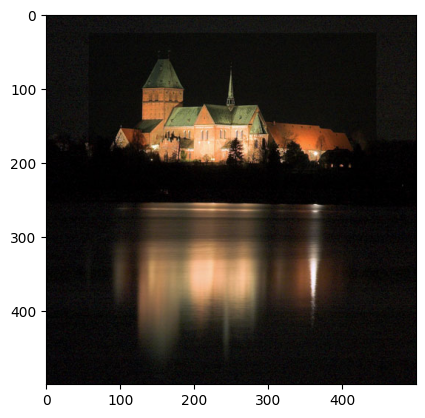

In [12]:
random_row = df_val.sample(n=1)
display(random_row)

image_path = random_row['Image_Path'].values[0]
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()

In [13]:
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [224, 224])

image = tf.expand_dims(image, axis=0)


In [14]:
predictions = model.predict(image)

# Get the predicted class
predicted_class_index = tf.argmax(predictions[0], axis=1)[0]
predicted_class_label = classes[predicted_class_index]

print(f"Predicted class: {predicted_class_label} with probability {predictions.max():.3%}")
print("True class:", random_row['Class'].values[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicted class: n03028079 with probability 95.446%
True class: n03028079
